<h3> About Bajaj Finserv </h3>

>Bajaj Finserv was formed in April 2007 as a result of its demerger from Bajaj Auto Limited to further the Group’s interests in financial services. This demerger enabled Bajaj Finserv to independently run the core businesses of Lending, Protection and savings. Bajaj Finserv Limited is the holding company for the businesses dealing with financial services of the Bajaj Group. It serves millions of customers in the financial services space by providing solutions for asset acquisition through financing, asset protection through general insurance, family protection and income protection in the form of life and health insurance and retirement and savings solutions <br>


__Lending__
Bajaj Finance Limited (BFL), participates in the financial business and is a company listed on The Stock Exchange, Mumbai (the BSE) and the National Stock Exchange (NSE).<br>
BFL also operates through a 100% subsidiary namely, Bajaj Housing Finance Limited (BHFL) which is registered with National Housing Bank (NHB) as a Housing Finance Company (HFC) for its mortgage business. BHFL started its operations in FY2018 and all the incremental mortgage business is now done through BHFL.

__Protection and savings__
These are done through (i) Bajaj Allianz General Insurance Company Limited (BAGIC) for general insurance including health insurance; and (ii) Bajaj Allianz Life Insurance Company Limited (BALIC) for life insurance and retirement plans. BAGIC and BALIC are both unlisted joint ventures with Allianz SE, one of the world’s leading composite insurers.

__Digital and Online Platform__
During the year under review, Bajaj Financial Holdings Ltd., a wholly-owned subsidiary, has firmed up new business plans for undertaking activities on digital and online platform to augment the business of the Company’s subsidiaries and has changed its name to Bajaj Finserv Direct Ltd. with effect from 27 February 2018

In addition, there are wind-farm assets in Maharashtra with an installed capacity of 65.2 MW.

<h3> Importing necessary Modules </h3>

In [234]:
import warnings
warnings.filterwarnings('ignore') 
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime    
from pandas import Series 
import statsmodels.api as sm

import plotly.express as pex
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

import xgboost
from hyperopt import hp
from scipy.stats import uniform, randint
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

from fbprophet import Prophet

<h3> The Data : </h3>

The data about Bajaj Finserv here is from 26 May 2008 to 30 September 2020.It has been taken from kaggle: https://www.kaggle.com/rohanrao/nifty50-stock-market-data

In [235]:
stock_data = pd.read_csv("BAJAJFINSV.csv")
stock_data.head()

,Date,Open,High,Low,Close,Volume
0,26-05-2008,600.00,619.00,501.0,509.10,3145446
1,27-05-2008,505.00,610.95,491.1,554.65,4349144
2,28-05-2008,564.00,665.60,564.0,640.95,4588759
3,29-05-2008,656.65,703.00,608.0,632.40,4522302
4,30-05-2008,642.40,668.00,588.3,644.00,3057669


In [236]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3118 entries, 0 to 3117
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3118 non-null   object 
 1   Open    3118 non-null   float64
 2   High    3118 non-null   float64
 3   Low     3118 non-null   float64
 4   Close   3118 non-null   float64
 5   Volume  3118 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 146.3+ KB


> The <b>Open and Close </b> features gives the opening and closing price of the stocks on a particular day.

> The <b>High and Low</b> features gives the highest and the lowest price for the stock on a particular day, respectively.

>The <b>Volume</b> feature tells us the total volume of stocks traded on a particular day. 


In [237]:
stock_data['Date'] = pd.to_datetime(stock_data.Date, format="%d-%m-%Y")

In [238]:
stock_data["year"] = stock_data.Date.dt.year
stock_data["month"] = stock_data.Date.dt.month
stock_data["week"] = stock_data.Date.dt.week
stock_data["day"] = stock_data.Date.dt.day
stock_data["day_of_week"] = stock_data.Date.dt.dayofweek

stock_data.set_index("Date", drop=False, inplace=True)

In [239]:
stock_data.fillna(stock_data.mean(), inplace=True)
stock_data.tail()

,Date,Open,High,Low,Close,Volume,year,month,week,day,day_of_week
Date,,,,,,,,,,,
2020-12-22,2020-12-22,8850.000000,8963.799805,8621.200195,8938.849609,783296,2020,12,52,22,1
2020-12-23,2020-12-23,8900.000000,9140.000000,8880.000000,9013.250000,575454,2020,12,52,23,2
2020-12-24,2020-12-24,9083.599609,9123.950195,8964.099609,8992.549805,498397,2020,12,52,24,3
2020-12-28,2020-12-28,9064.650391,9115.000000,8965.000000,8995.049805,344994,2020,12,53,28,0
2020-12-29,2020-12-29,9040.099609,9056.099609,8897.450195,8976.049805,406601,2020,12,53,29,1


<h3> Data Visualisation </h3>

<h4> Plots of time series of Open , Close, High and Low values

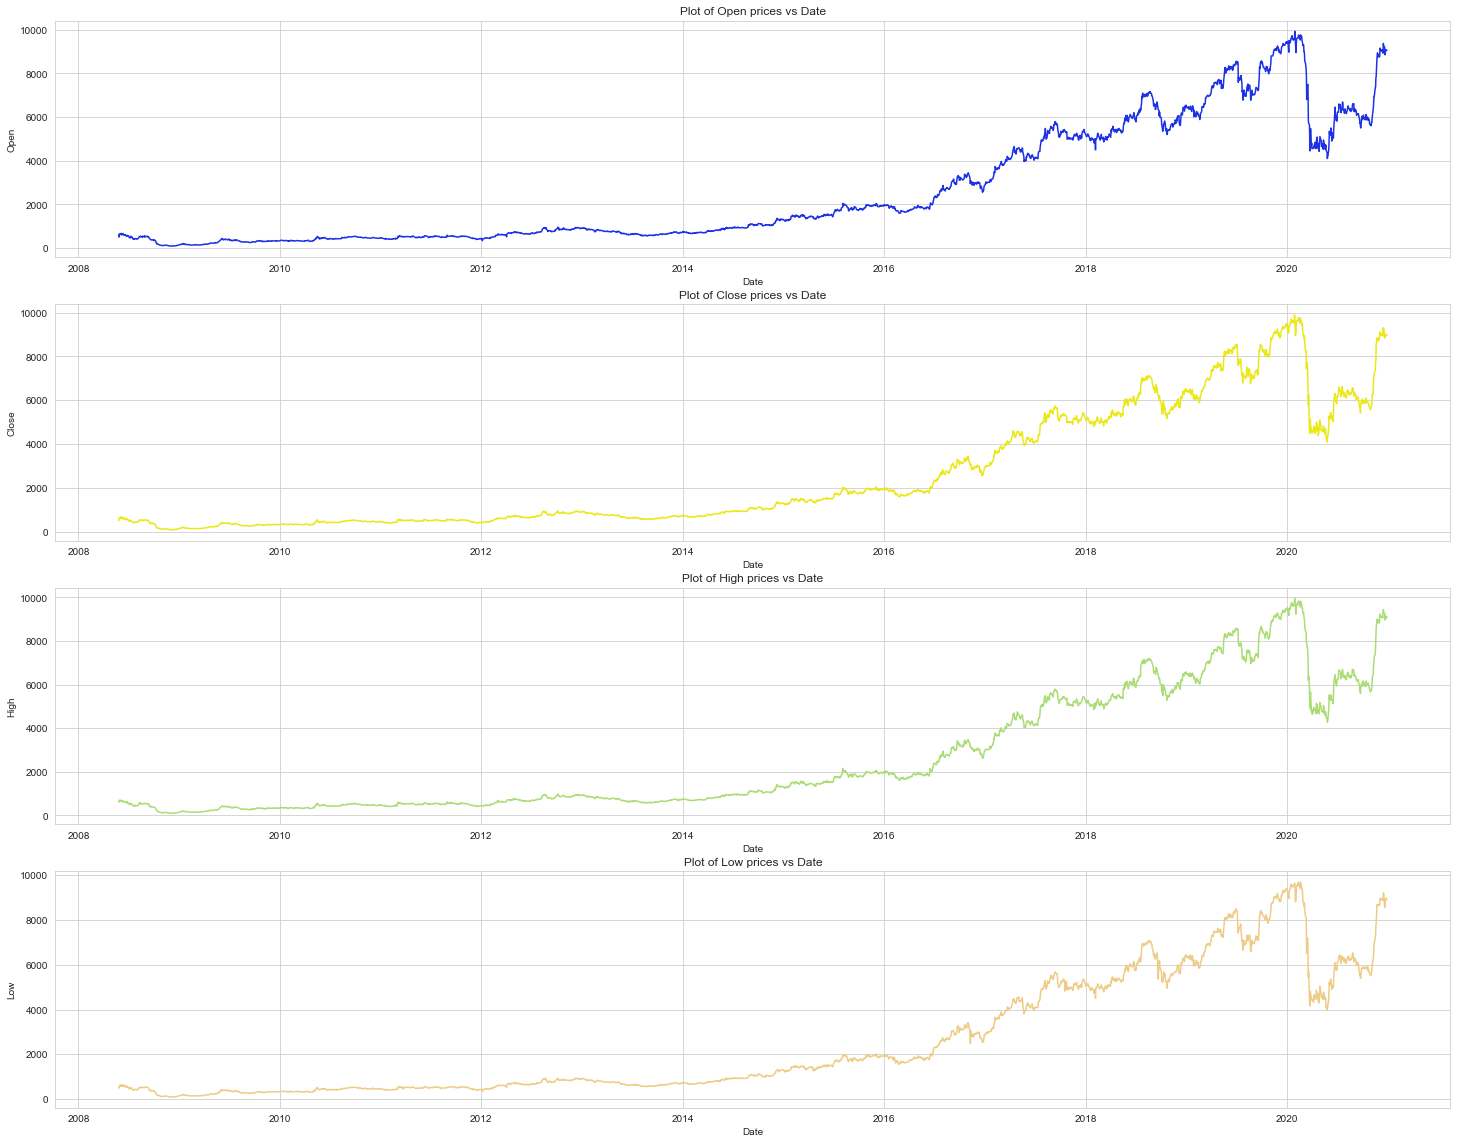

In [241]:
fig, ax = plt.subplots(4,1,figsize = (25,20))

ax[0].set_xlabel('Date')
ax[0].set_ylabel('Open')
ax[0].set_title("Plot of Open prices vs Date")
ax[0].plot(stock_data.index, stock_data.Open,color = '#1E32E5',label = 'Open prices')

ax[1].set_xlabel('Date')
ax[1].set_ylabel('Close')
ax[1].set_title("Plot of Close prices vs Date")
ax[1].plot(stock_data.index, stock_data.Close,color = '#ECE818',label = 'Close prices')

ax[2].set_xlabel('Date')
ax[2].set_ylabel('High')
ax[2].set_title("Plot of High prices vs Date")
ax[2].plot(stock_data.index, stock_data.High,color = '#ABDC76',label = 'Close prices')

ax[3].set_xlabel('Date')
ax[3].set_ylabel('Low')
ax[3].set_title("Plot of Low prices vs Date")
ax[3].plot(stock_data.index, stock_data.Low,color = '#EECC87',label = 'Close prices')

<h4> Moving Averages of Closing prices by weeks

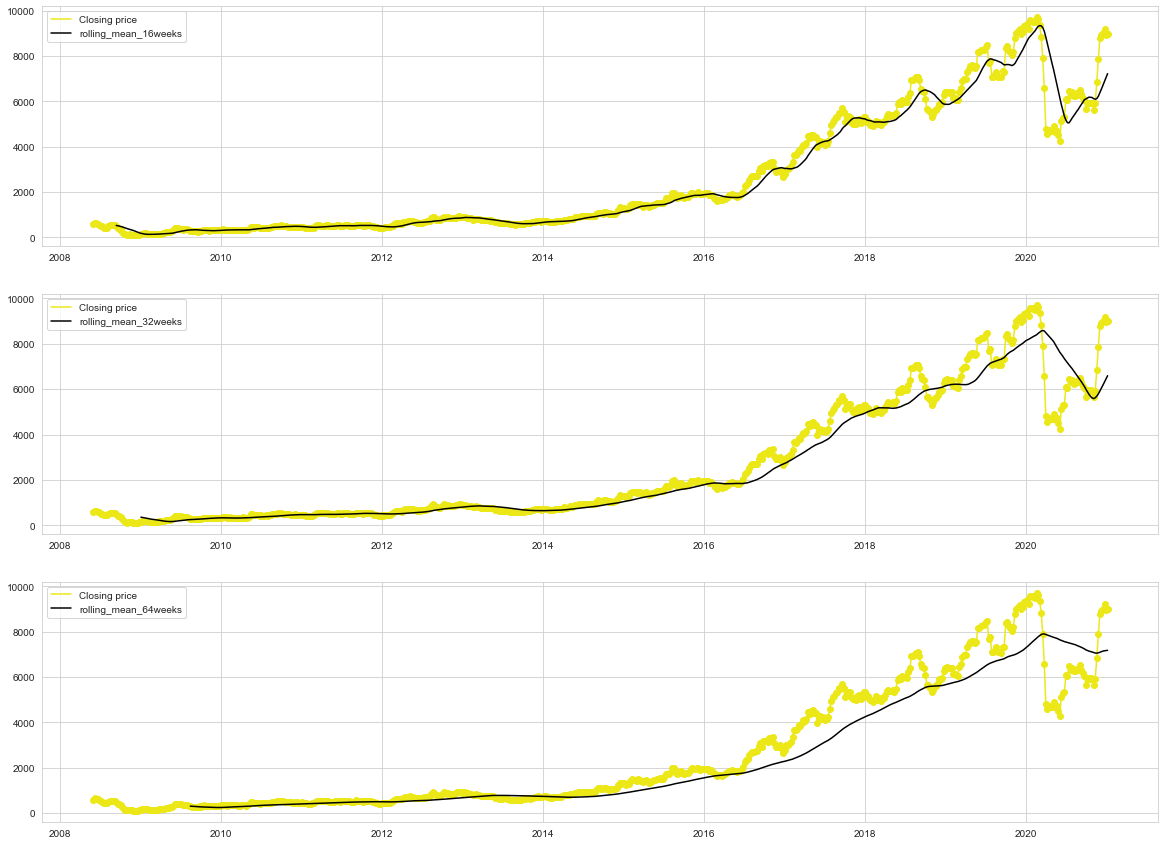

In [244]:
moving_avg = pd.DataFrame()
# Grouping the data week by week by taking its average.So there will be total 52 rows in the final list
moving_avg['Close'] = stock_data['Close'].resample('W').mean()
moving_avg['16_weeks'] = moving_avg['Close'].rolling(window = 16,center = False).mean()
moving_avg['32_weeks'] = moving_avg['Close'].rolling(window = 32,center = False).mean()
moving_avg['64_weeks'] = moving_avg['Close'].rolling(window = 64,center = False).mean()
# print(moving_avg)

fig , ax = plt.subplots(3,1,figsize = (20,15))

ax[0].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[0].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[0].plot(moving_avg.index,moving_avg['16_weeks'],color = "black",label="rolling_mean_16weeks")
ax[0].legend()

ax[1].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[1].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[1].plot(moving_avg.index,moving_avg['32_weeks'],color = "black",label="rolling_mean_32weeks")
ax[1].legend()

ax[2].scatter(moving_avg.index, moving_avg.Close,color = '#ECE818')
ax[2].plot(moving_avg.index, moving_avg.Close,color = '#ECE818',label = "Closing price")
ax[2].plot(moving_avg.index,moving_avg['64_weeks'],color = "black",label="rolling_mean_64weeks")
ax[2].legend()



<h4> Moving Average of Closing price by Days

In case of stock data, on saturdays and sundays, market remains closed, so Friday's close price could be forwarded in closing days.
> For example, in the below data , 26th September and 27th september are Saturday and Sunday respectively, So Friday's(25th September) data are forwarded to those days

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.asfreq.html <br>
We are using DataFrame.asfreq() function. Because it also provide us option of padding.
In this a Method argument is used for filling holes in reindexed Series (note this does not fill NaNs that already were present):
- ‘pad’ / ‘ffill’: propagate last valid observation forward to next valid
- ‘backfill’ / ‘bfill’: use NEXT valid observation to fill.

In [246]:
stock_data = stock_data.drop(['Date'], axis = 1)

stock_daily = stock_data.asfreq('D', method ='pad')
stock_daily.tail(6)

,Open,High,Low,Close,Volume,year,month,week,day,day_of_week
Date,,,,,,,,,,
2020-12-24,9083.599609,9123.950195,8964.099609,8992.549805,498397,2020,12,52,24,3
2020-12-25,9083.599609,9123.950195,8964.099609,8992.549805,498397,2020,12,52,24,3
2020-12-26,9083.599609,9123.950195,8964.099609,8992.549805,498397,2020,12,52,24,3
2020-12-27,9083.599609,9123.950195,8964.099609,8992.549805,498397,2020,12,52,24,3
2020-12-28,9064.650391,9115.000000,8965.000000,8995.049805,344994,2020,12,53,28,0
2020-12-29,9040.099609,9056.099609,8897.450195,8976.049805,406601,2020,12,53,29,1


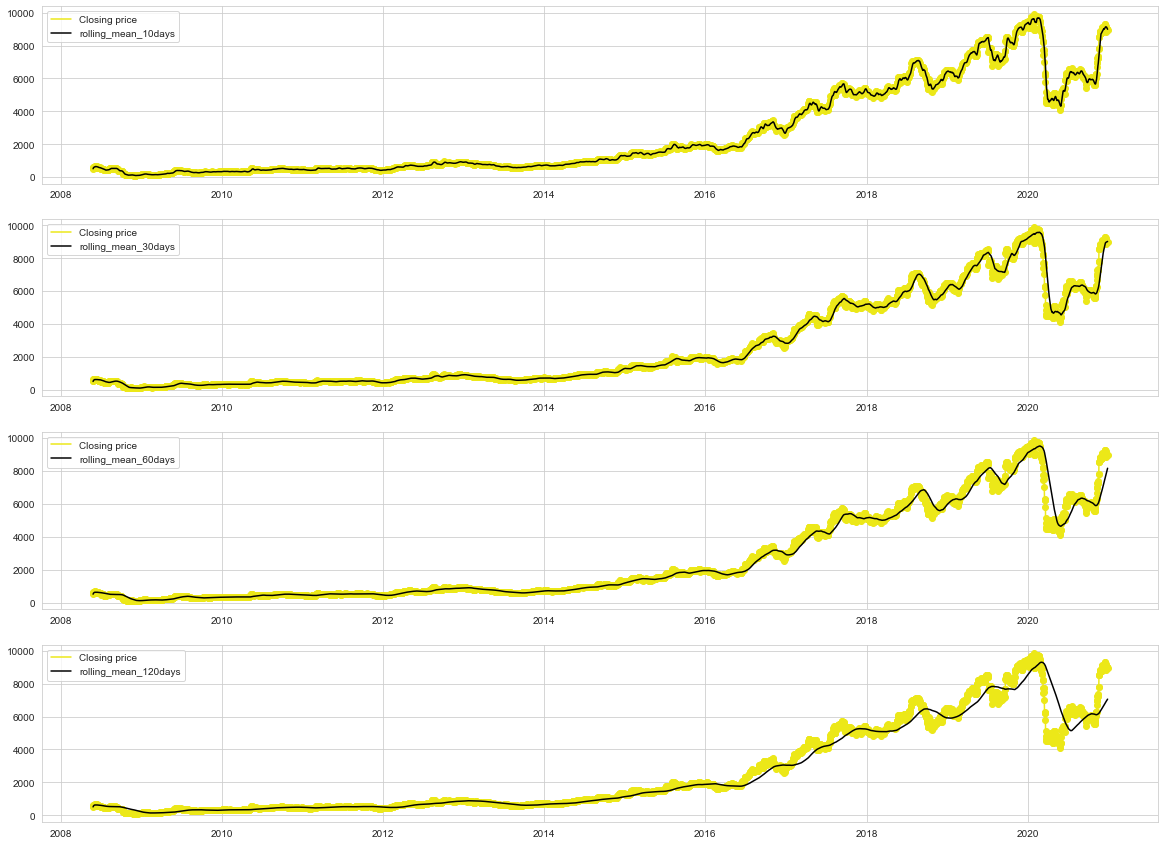

In [248]:
stock_data = stock_data.reset_index()
moving_avg_daily = pd.DataFrame()

moving_avg_daily['Close'] = stock_daily['Close']
moving_avg_daily['10_days'] = moving_avg_daily['Close'].rolling(window = 10, min_periods = 1).mean()
moving_avg_daily['30_days'] = moving_avg_daily['Close'].rolling(window = 30, min_periods = 1).mean()
moving_avg_daily['60_days'] = moving_avg_daily['Close'].rolling(window = 60, min_periods = 1).mean()
moving_avg_daily['120_days'] = moving_avg_daily['Close'].rolling(window = 120, min_periods = 1).mean()

fig , ax = plt.subplots(4,1,figsize = (20,15))

ax[0].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[0].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[0].plot(moving_avg_daily.index,moving_avg_daily['10_days'],color = "black",label="rolling_mean_10days")
ax[0].legend()

ax[1].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[1].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[1].plot(moving_avg_daily.index, moving_avg_daily['30_days'],color = "black",label="rolling_mean_30days")
ax[1].legend()

ax[2].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[2].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[2].plot(moving_avg_daily.index, moving_avg_daily['60_days'],color = "black",label="rolling_mean_60days")
ax[2].legend()

ax[3].scatter(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818')
ax[3].plot(moving_avg_daily.index, moving_avg_daily.Close,color = '#ECE818',label = "Closing price")
ax[3].plot(moving_avg_daily.index, moving_avg_daily['120_days'],color = "black",label="rolling_mean_120days")
ax[3].legend()


<h4> Auto Correlation and Partial Auto Correlation Plots.

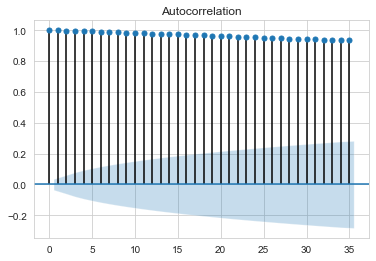

In [249]:
plot_acf(stock_data.Close)
plt.show()

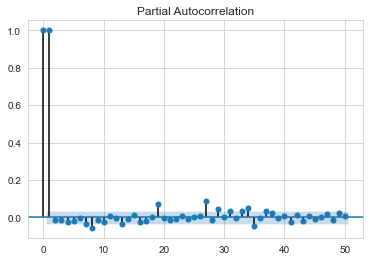

In [250]:
plot_pacf(stock_data.Close, lags=50)
plt.show()

<h3> Forecasting stock Prices with Prophet </h3>

In [253]:
stock_daily = stock_daily.reset_index()

In [282]:
train_X = stock_daily[:-60]
cv_X = stock_daily[-60:]

model = Prophet()
model.fit(train_X[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))
forecast_data = model.predict(cv_X[["Date", "Close"]].rename(columns={"Date": "ds", "Close": "y"}))

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [281]:
forecast_data[['ds','yhat']].tail()

,ds,yhat
25,2020-12-25,7395.065619
26,2020-12-26,7397.339766
27,2020-12-27,7400.111503
28,2020-12-28,7394.409240
29,2020-12-29,7402.818791


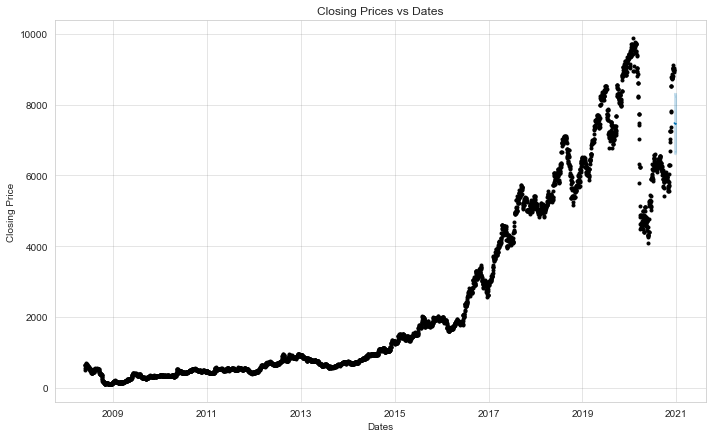

In [279]:
model.plot(forecast_data)
plt.title('Closing Prices vs Dates')
plt.xlabel('Dates')
plt.ylabel("Closing Price")
plt.show()

In [262]:
forecast_data.head(3)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-09-01,7627.811892,6911.502419,8546.320618,7627.811892,7627.811892,106.043564,106.043564,106.043564,-1.075866,-1.075866,-1.075866,107.119429,107.119429,107.119429,0.0,0.0,0.0,7733.855456
1,2020-09-02,7629.669802,6938.790824,8488.671907,7629.669802,7629.669802,113.801434,113.801434,113.801434,1.747516,1.747516,1.747516,112.053918,112.053918,112.053918,0.0,0.0,0.0,7743.471237
2,2020-09-03,7631.527713,6985.351385,8576.663699,7631.527713,7631.527713,118.131881,118.131881,118.131881,1.005082,1.005082,1.005082,117.126799,117.126799,117.126799,0.0,0.0,0.0,7749.659594


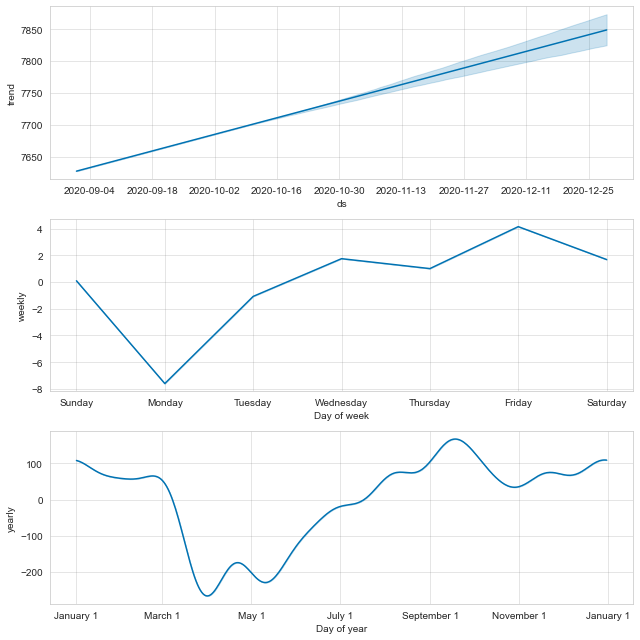

In [263]:
fig = model.plot_components(forecast_data)
plt.show()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


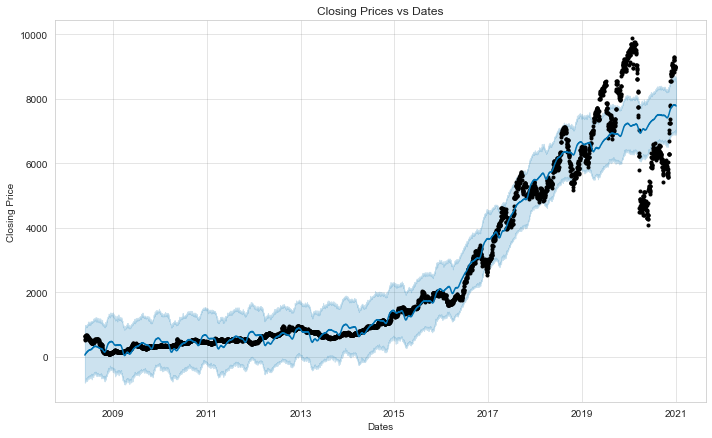

In [272]:
model2 = Prophet(changepoint_prior_scale=0.01).fit(stock_daily[['Date','Close']].rename(columns={"Date": "ds", "Close": "y"}))
future_daily_prices = model2.make_future_dataframe(periods=5)
forecast_data2 = model2.predict(future_daily_prices)

model2.plot(forecast_data2)
plt.title('Closing Prices vs Dates')
plt.xlabel('Dates')
plt.ylabel("Closing Price")
plt.show()

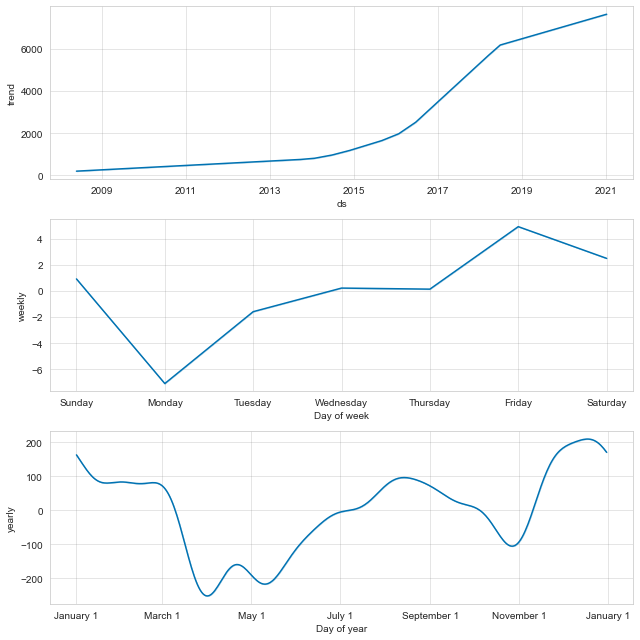

In [273]:
fig = model2.plot_components(forecast_data2)
plt.show()

In [275]:
forecast_data2[['ds','yhat']].tail()

,ds,yhat
4601,2020-12-30,7795.374869
4602,2020-12-31,7791.064663
4603,2021-01-01,7791.329989
4604,2021-01-02,7784.190789
4605,2021-01-03,7777.766978


In [313]:
print("Forecasted value on " , np.squeeze(forecast_data2['ds'][-4:-3]), "is ",np.round(np.squeeze(forecast_data2['yhat'][-4:-3]),2))

Forecasted value on  2020-12-31 00:00:00 is  7791.06


<h3> Forecasting stock prices with XGBOOST </h3>

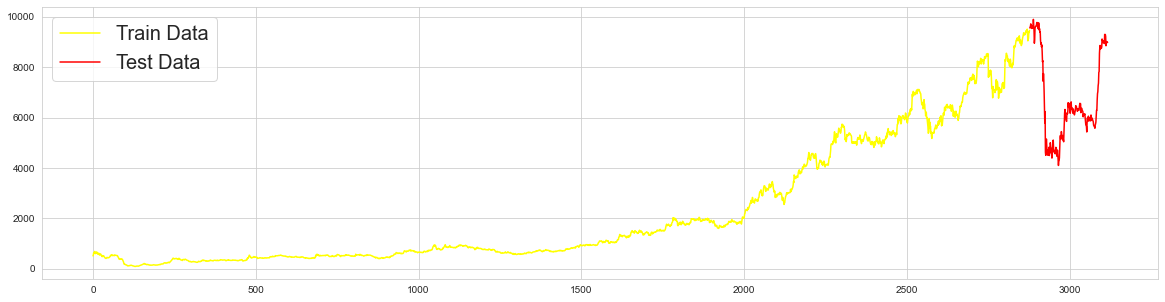

In [315]:
stock_days_cv = stock_daily[-240:]
count_stock_days_train = len(stock_daily) - len(stock_days_cv)

x = stock_daily['Close']
X_train = []
y_train = []
for i in range(30, count_stock_days_train):
    X_train.append(x[i-30:i])
    y_train.append(x[i])

x = stock_daily['Close'][count_stock_days_train :].values
X_test = []
y_test = []
for i in range(30, len(x)):
    X_test.append(x[i-30:i])
    y_test.append(x[i])
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)



plt.figure(figsize = (20,5))
plt.plot(stock_data[:-240].index,stock_data[:-240].Close , color = 'yellow',label = 'Train Data')
plt.plot(stock_data[-240:].index,stock_data[-240:].Close, color = 'red',label = 'Test Data')
plt.legend(fontsize = 20)

In [298]:
xgb = xgboost.XGBRegressor(random_state = 101, tree_method='gpu_hist')

xgb.fit(X_train, y_train)
prediction = xgb.predict(X_test)
mean_avg_error = np.round(mean_absolute_error(prediction, y_test), 5)
mean_sq_error = np.round(mean_squared_error(prediction, y_test), 5)
print(' ')
print('Mean Absolute Error :',mean_avg_error)
print('Root Mean Squared Error :',np.sqrt(mean_sq_error))

 
Mean Absolute Error : 133.40326
Root Mean Squared Error : 190.95857938306935


<h4>k-fold Cross Validation

In [75]:
kfold = KFold(n_splits = 10, shuffle=True)
cv_score = cross_val_score(xgb, X_train, y_train, cv=kfold, n_jobs= -1, scoring = 'neg_mean_absolute_error')
cv_score = np.round(-1 * cv_score.mean(), 5)
print('Cross-Validation Mean Absolute Error :', cv_score)

Cross-Validation Mean Absolute Error : 30.96338


<h4>Hyperparameter tuning

In [ ]:
params = {
        'n_estimators': randint(1000, 2000),'learning_rate': uniform(0.01, 0.06),'max_depth': [5, 10, 15, 20],
        'min_child_weight': [1, 5, 10, 15],'subsample': [0.7, 0.05, 0.1],'gamma': [0.1, 0.5, 0.05],
        'colsample_bytree': [0.1, 0.5, 0.05],'alpha' : [0.5, 1, 5],'lambda': [0.1, 1, 3],
}

optimal_model = xgboost.XGBRegressor(random_state = 101, tree_method='gpu_hist')

kfold = KFold(n_splits = 5, shuffle=True)
random_search = RandomizedSearchCV(estimator = optimal_model, param_distributions = params, cv = kfold, verbose = 1, 
                           scoring = 'neg_mean_absolute_error', n_jobs = -1)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_ 
best_score = np.round((-1 * random_search.best_score_), 5)

print("Best Parameters : ", best_params)
print("Best Score : ", best_score)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


<h4> Now, we prepare the data for predicting the Close Value on 31-12-2020.

In [310]:
last_30days = stock_daily['Close'][len(stock_daily) - 30 : ]
testing_data = np.array([last_30days])
# print(testing_data)


model = xgboost.XGBRegressor()
model.fit(X_train, y_train)
# predicting the Closing Values for the test data
predictions = model.predict(X_test)
# predicting the closing price of 1 October 2020
pred = model.predict(testing_data)

print('Prediction of close value of bajaj Finserv for 30 Dec 2020 = Rs ', np.squeeze(pred))


Prediction of close value of bajaj Finserv for 30 Dec 2020 = Rs  9091.232


<h3> Using LSTM to forecast stock prices

In [99]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import MinMaxScaler

In [62]:
stock_data.head(3)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,year,month,week,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,
2008-05-26,2008-05-26,BAJAJFINSV,EQ,2101.05,600.0,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,17727.721574,908264,0.2888,2008,5,22,26,0
2008-05-27,2008-05-27,BAJAJFINSV,EQ,509.10,505.0,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,17727.721574,677627,0.1558,2008,5,22,27,1
2008-05-28,2008-05-28,BAJAJFINSV,EQ,554.65,564.0,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,17727.721574,774895,0.1689,2008,5,22,28,2


In [78]:
stockData = stock_data.loc[:,['Date', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close']]
stockData_lstm = stock_data.loc[:,['Date', 'Close']]
stockData_lstm.head()

,Date,Close
Date,,
2008-05-26,2008-05-26,509.10
2008-05-27,2008-05-27,554.65
2008-05-28,2008-05-28,640.95
2008-05-29,2008-05-29,632.40
2008-05-30,2008-05-30,644.00


<h3> Splitting Data into Train, CV and Test dataset.

In [81]:
len_cv = int(0.20* len(stockData_lstm))
len_train = len(stockData_lstm) - len_cv - len_test


data_train = stockData_lstm[:len_train]
data_cv = stockData_lstm[len_train : len_train + len_cv]
data_test = stockData_lstm[len_train + len_cv : ]

data_train_cv = stockData_lstm[: len_train + len_cv]

In [85]:
assert(len(stock_data) == len(data_train) + len(data_cv) + len(data_test))

In [92]:
#Function to get Independent(x) and dependent (y) variables from the data
def predictors(data, N , offset):
    X,y = [],[]
    for i in range(offset,len(data)):
        X.append(data[i-N:i])
        y.append(data[i])
    X,y  = np.array(X), np.array(y)
    return X,y   

#Function to calculate Mean Absolute Percentage error
def Mape(y, y_pred): 
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs((y - y_pred) / y)) * 100

In [118]:
scale = MinMaxScaler(feature_range=(0, 1))
scaled_train = scale.fit_transform(np.array(data_train['Close']).reshape(-1,1))
scaled_cv = scale.fit_transform(np.array(data_cv['Close']).reshape(-1,1))
scaled_train_cv = scale.fit_transform(np.array(data_train_cv['Close']).reshape(-1,1))
scaled_test = scale.fit_transform(np.array(data_test['Close']).reshape(-1,1))

train_X,train_y = predictors(scaled_train,60 ,60)
cv_X , cv_y = predictors(scaled_train_cv,60,len_train)

In [119]:
num_lstm = 100
num_dense = 100
rate_drop_lstm = 0.178
rate_drop_dense = 0.171
STAMP = 'lstm2_%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm,rate_drop_dense)
bst_model_path = STAMP + '.h5'

In [120]:
model = Sequential()
model.add(LSTM(num_lstm, return_sequences=True, input_shape=(train_X.shape[1],1),dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))

In [121]:
model.compile(
    loss='mean_squared_error', 
    optimizer='adam',
    metrics=['acc']
)
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)
hist = model.fit(train_X, train_y, validation_data=(cv_X, cv_y) ,epochs = 20, batch_size=1,callbacks=[early_stopping, model_checkpoint])


Train on 2082 samples, validate on 611 samples
Epoch 1/20
2082/2082 [==============================] - 79s 38ms/step - loss: 0.0203 - acc: 9.6061e-04 - val_loss: 0.0098 - val_acc: 0.0016
Epoch 2/20
2082/2082 [==============================] - 82s 39ms/step - loss: 0.0168 - acc: 9.6061e-04 - val_loss: 0.0156 - val_acc: 0.0016
Epoch 3/20
2082/2082 [==============================] - 79s 38ms/step - loss: 0.0134 - acc: 9.6061e-04 - val_loss: 0.0184 - val_acc: 0.0016
Epoch 4/20
2082/2082 [==============================] - 79s 38ms/step - loss: 0.0120 - acc: 9.6061e-04 - val_loss: 0.0070 - val_acc: 0.0016
Epoch 5/20
2082/2082 [==============================] - 81s 39ms/step - loss: 0.0110 - acc: 9.6061e-04 - val_loss: 0.0193 - val_acc: 0.0016
Epoch 6/20
2082/2082 [==============================] - 78s 37ms/step - loss: 0.0124 - acc: 9.6061e-04 - val_loss: 0.0213 - val_acc: 0.0016
Epoch 7/20
2082/2082 [==============================] - 79s 38ms/step - loss: 0.0114 - acc: 9.6061e-04 - val_loss

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


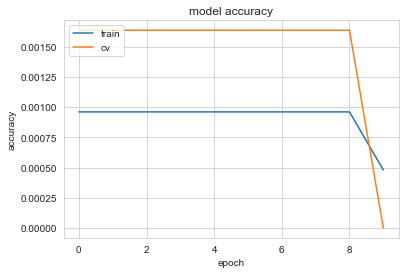

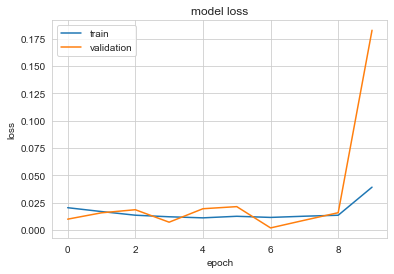

In [122]:
print(hist.history.keys())

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'cv'], loc='upper left')
plt.show()

# loss per epochs
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

model.load_weights(bst_model_path)
bst_val_score = min(hist.history['val_loss'])

In [ ]:
result = model.evaluate(test_X,test_y)